Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).
X.shape is (120000, 100)
Proceed 0 of 100
Proceed 10 of 100
Proceed 20 of 100
Proceed 30 of 100
Proceed 40 of 100
Proceed 50 of 100
Proceed 60 of 100
Proceed 70 of 100
Proceed 80 of 100
Proceed 90 of 100
Train shape: (120000, 100)
Test shape: (120000, 100)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Model accuracy: 100.00%


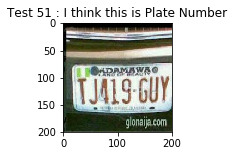

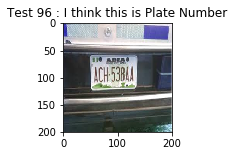

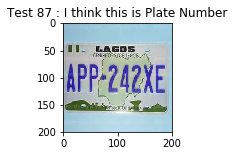

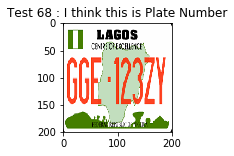

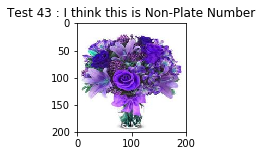

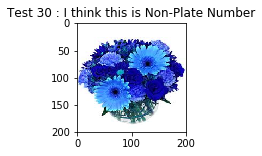

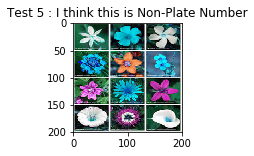

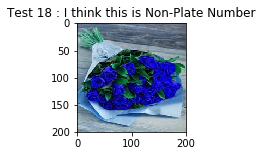

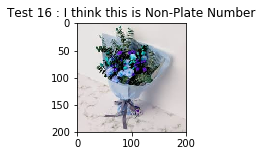

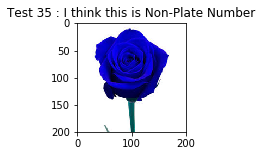

In [129]:
from google.colab import drive
from sklearn.linear_model import LogisticRegressionCV
drive.mount('drive')


import os,cv2,itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
'exec(%matplotlib inline)'
plate_numbers = 'drive/My Drive/plate_num/plate_number/'
negative_images = 'drive/My Drive/plate_num/negative_images/'
ROWS = 200
COLS = 200
CHANNELS = 3

train_images = [plate_numbers+i for i in os.listdir(plate_numbers)]
test_images = [negative_images+i for i in os.listdir(negative_images)]
len(train_images),len(test_images)


def read_image(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (ROWS, COLS),interpolation=cv2.INTER_CUBIC)

def prep_data(images):
  m = len(images)
  n_x = ROWS*COLS*CHANNELS
  
  X = np.ndarray((n_x,m), dtype=np.uint8)
  y = np.zeros((1,m))
  print("X.shape is {}".format(X.shape))
  
  for i,image_file in enumerate(images) :
    image = read_image(image_file)
    X[:,i] = np.squeeze(image.reshape((n_x,1)))
    if '-' in image_file.lower() :
      y[0,i] = 1
    else:
      y[0,i] = 0

      
    if i%10 == 0 :
      print("Proceed {} of {}".format(i, m))
    
  return X,y

X_train, y_train = prep_data(train_images + test_images)

print("Train shape: {}".format(X_train.shape))
print("Test shape: {}".format(X_test.shape))

classes = {1: 'Plate Number',
           0: 'Non-Plate Number'}

  
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV()
X_train_lr, y_train_lr = X_train.T, y_train.T.ravel()
clf.fit(X_train_lr, y_train_lr)
print("Model accuracy: {:.2f}%".format(clf.score(X_train_lr, y_train_lr)*100))
  
def show_image_prediction(X, idx, model) :
  image = X[idx].reshape(1,-1)
  image_class = classes[model.predict(image).item()]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize = (4,2))
  plt.imshow(image)
  plt.title("Test {} : I think this is {}".format(idx, image_class))
  plt.show()
    
    
X_test_lr, test_idx = X_test.T, test_idx.T

for i in np.random.randint(0, len(X_test_lr), 10) :
  show_image_prediction(X_test_lr, i, clf)
    
